In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv


In [2]:
df=pd.read_csv('/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv')
df.head(5)

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


f=female,m=male


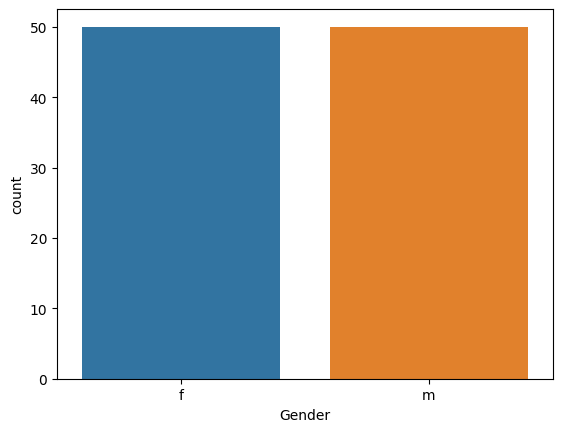

In [3]:
sns.countplot(x='Gender',data=df)
print('f=female,m=male')
plt.show()


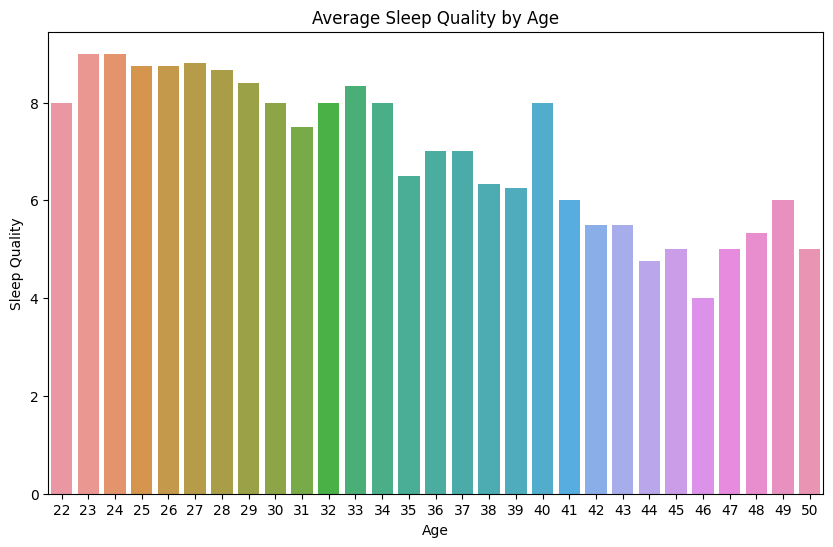

In [4]:
agequal = df.groupby('Age')['Sleep Quality'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Sleep Quality', data=agequal)
plt.title('Average Sleep Quality by Age')
plt.show()

A general decline in sleep quality as age progresses.

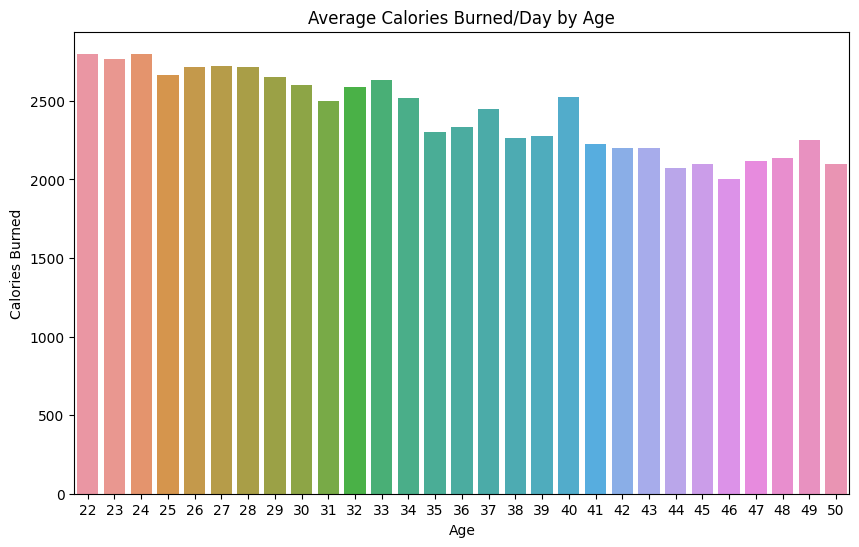

In [5]:
ageburn = df.groupby('Age')['Calories Burned'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Calories Burned', data=ageburn)
plt.title('Average Calories Burned/Day by Age')
plt.show()

Calories Burned also gradually drops as age progress.

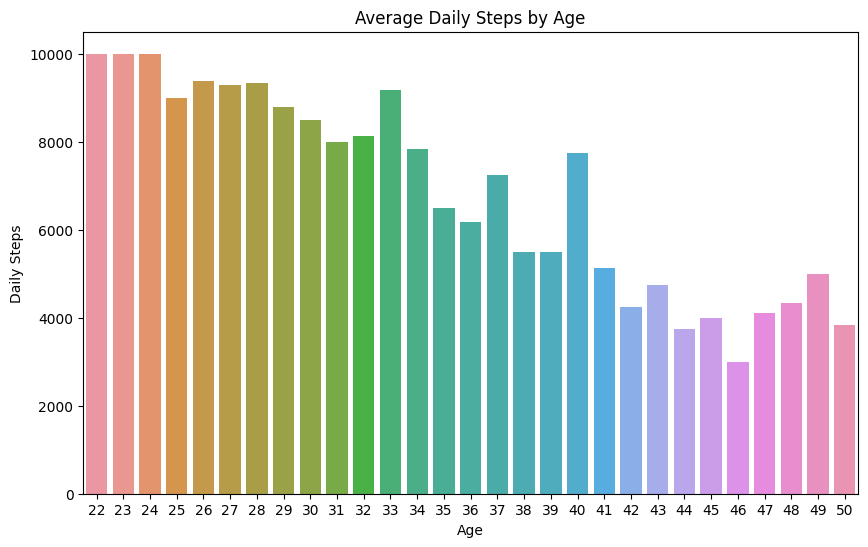

In [6]:
agequal = df.groupby('Age')['Daily Steps'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Daily Steps', data=agequal)
plt.title('Average Daily Steps by Age')
plt.show()

Daily steps also drops as age progress.

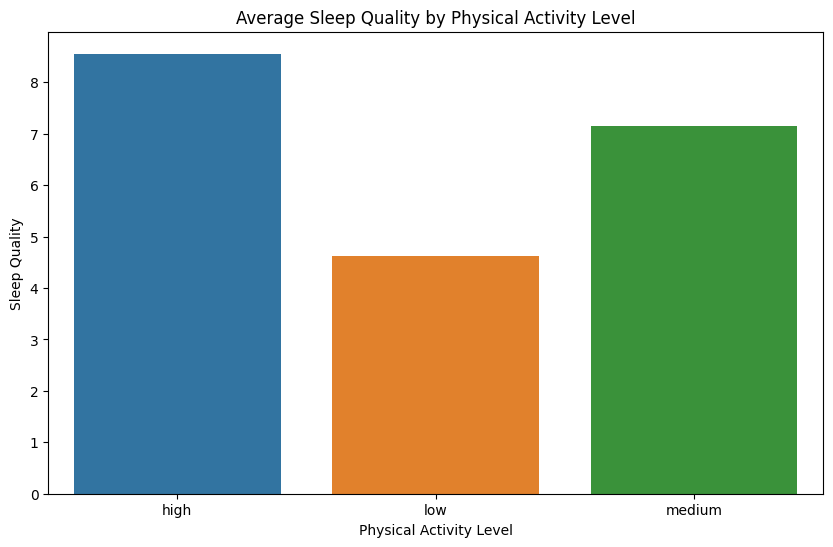

In [7]:
physqual = df.groupby('Physical Activity Level')['Sleep Quality'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Physical Activity Level', y='Sleep Quality', data=physqual)
plt.title('Average Sleep Quality by Physical Activity Level')
plt.show()

Sleep Quality is highest when physical activity as high, and sleep quality is lowest when physical activity is low.

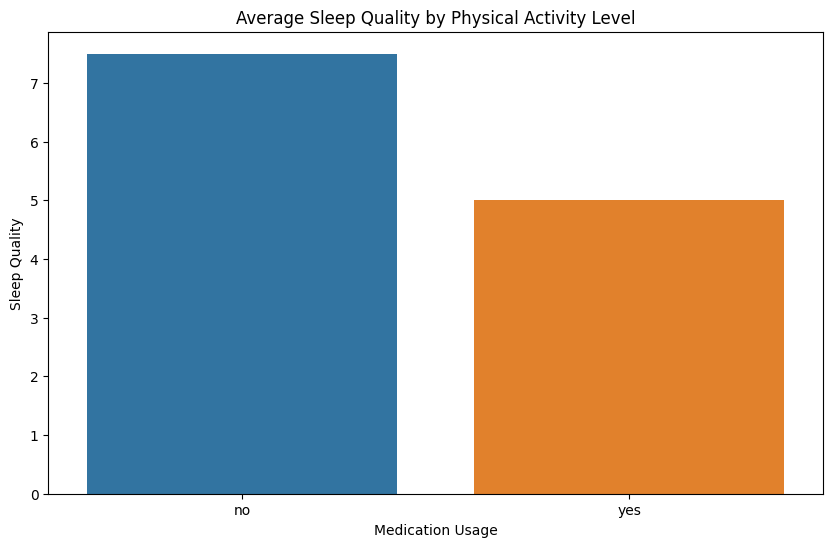

In [8]:
medqual = df.groupby('Medication Usage')['Sleep Quality'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Medication Usage', y='Sleep Quality', data=medqual)
plt.title('Average Sleep Quality by Physical Activity Level')
plt.show()

Sleep Quality is much higher without medication usage.

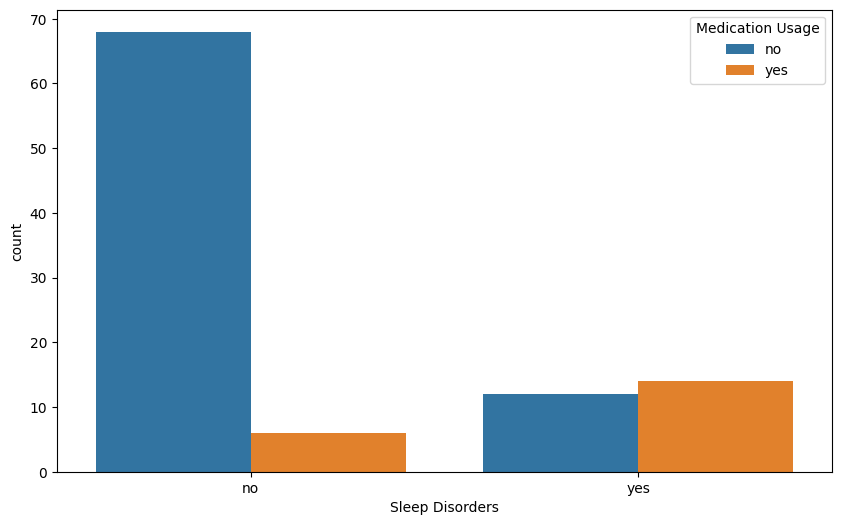

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sleep Disorders', hue='Medication Usage', data=df)
plt.show()

A large amount of people who don't have sleep disorders don't do medication usage but people who have sleep disorders are roughly equal in terms of medication usage.

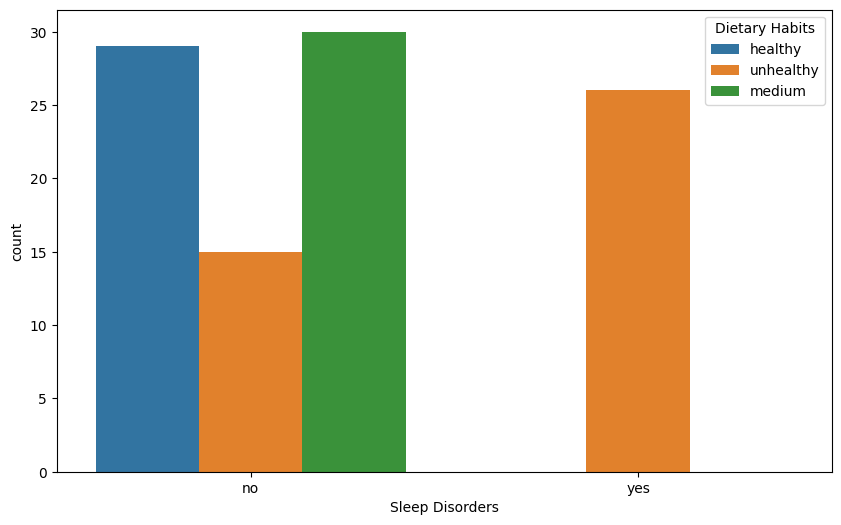

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sleep Disorders', hue='Dietary Habits', data=df)
plt.show()

A large amount of people who don't have sleep disorders have medium/healthy dietary habits while everyone with sleep disorders has unhealthy dietary habits.

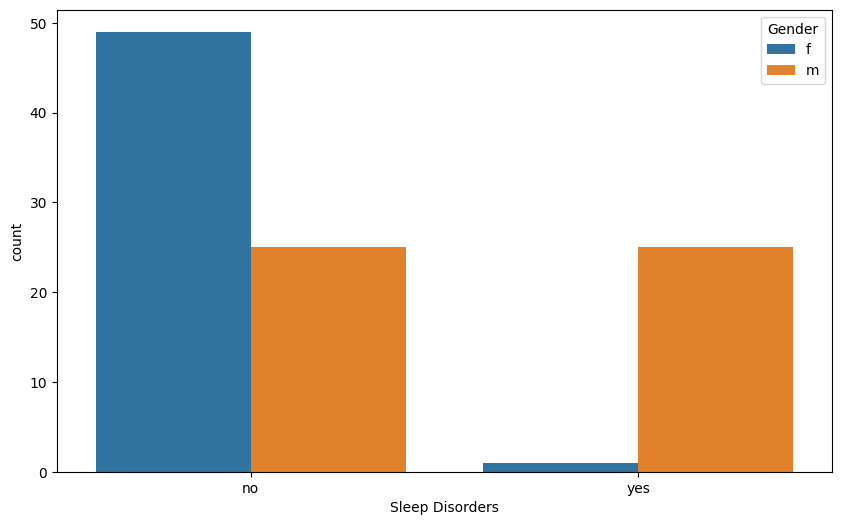

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sleep Disorders', hue='Gender', data=df)
plt.show()

For people with no sleep disorders, a large amount of females have sleep disorders compared to men. For people with sleep disorders, there is a much larger set of males than there is for females.

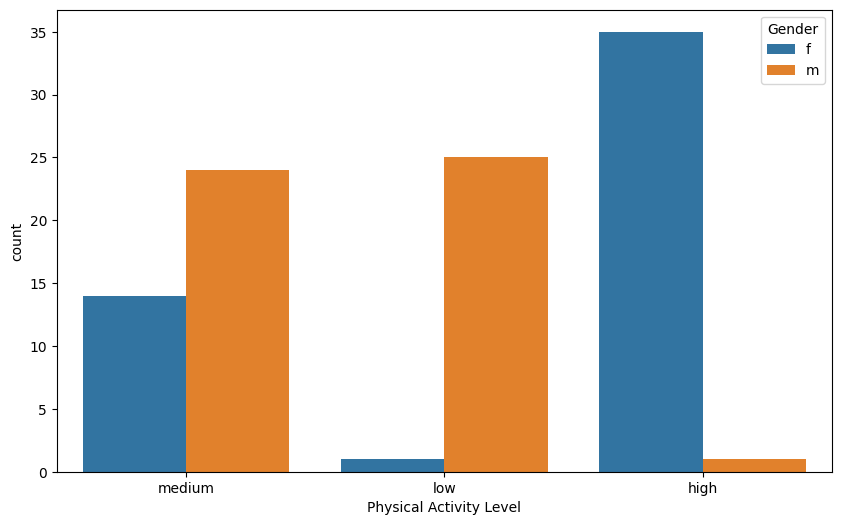

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Physical Activity Level', hue='Gender', data=df)
plt.show()

For people with low physical activity, the set of men is much larger than the set of women. With medium physical acitivty, it is the same case. For people with high phyiscal activity, the amount of women dominate the amount of men.

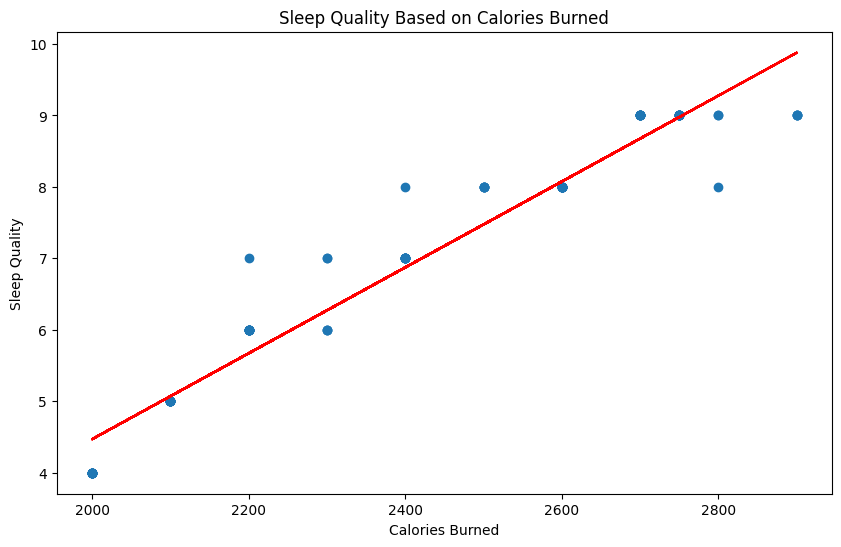

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['Calories Burned'],df['Sleep Quality'])
plt.title("Sleep Quality Based on Calories Burned")
plt.xlabel('Calories Burned')
plt.ylabel('Sleep Quality')
z = np.polyfit(df['Calories Burned'], df['Sleep Quality'], 1)
p = np.poly1d(z)

plt.plot(df['Calories Burned'], p(df['Calories Burned']), color='red', label="Trend line")


plt.show()

Sleep quality tends to increase as calories burned increase.

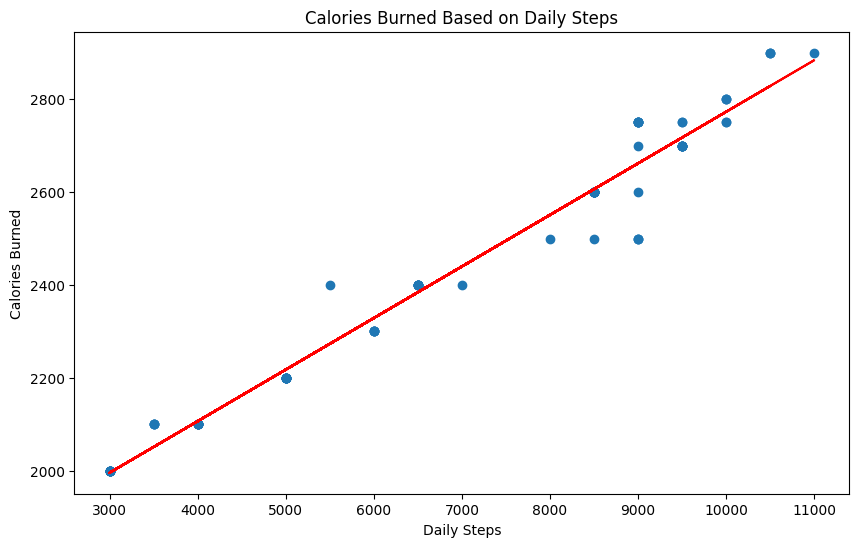

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['Daily Steps'],df['Calories Burned'])
plt.title("Calories Burned Based on Daily Steps")
plt.xlabel('Daily Steps')
plt.ylabel('Calories Burned')
z = np.polyfit(df['Daily Steps'], df['Calories Burned'], 1)
p = np.poly1d(z)

plt.plot(df['Daily Steps'], p(df['Daily Steps']), color='red', label="Trend line")


plt.show()

Calories burned tend to increase as daily steps increase (as expected).

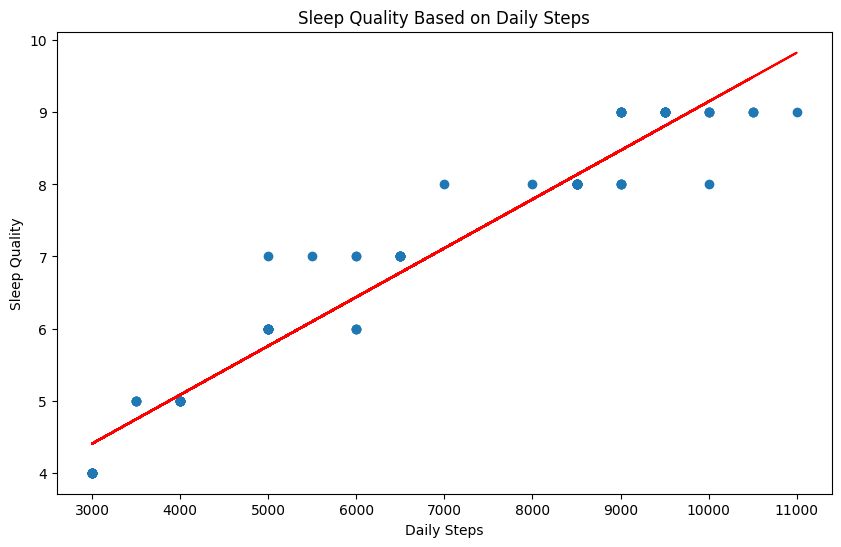

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['Daily Steps'],df['Sleep Quality'])
plt.title("Sleep Quality Based on Daily Steps")
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Quality')
z = np.polyfit(df['Daily Steps'], df['Sleep Quality'], 1)
p = np.poly1d(z)

plt.plot(df['Daily Steps'], p(df['Daily Steps']), color='red', label="Trend line")


plt.show()

Sleep quality tends to increase as daily steps increase.

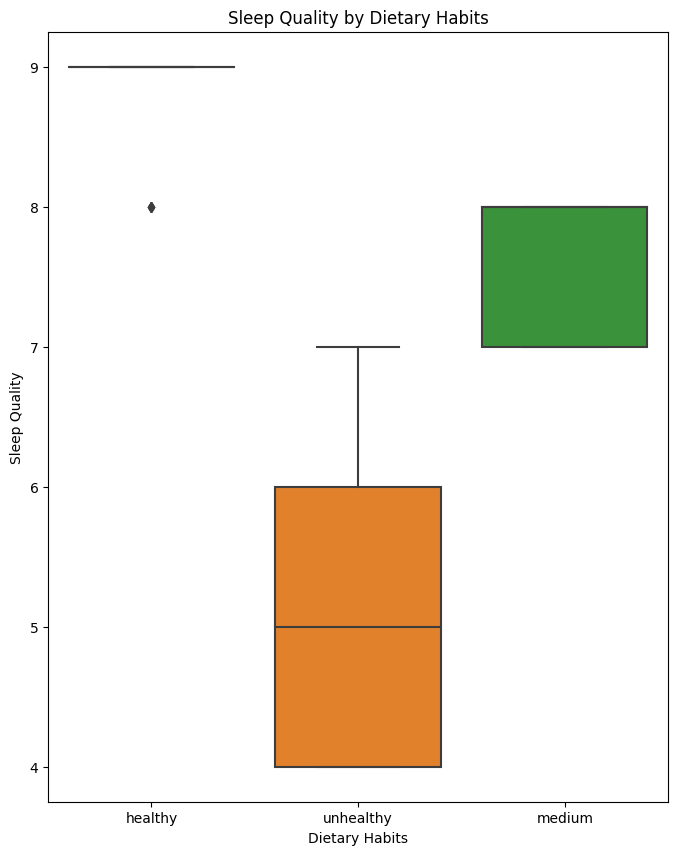

In [16]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Dietary Habits', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Dietary Habits')
plt.show()

Overall, people with healthy habits tend to have much better sleep quality compared to those with unhealthy habits

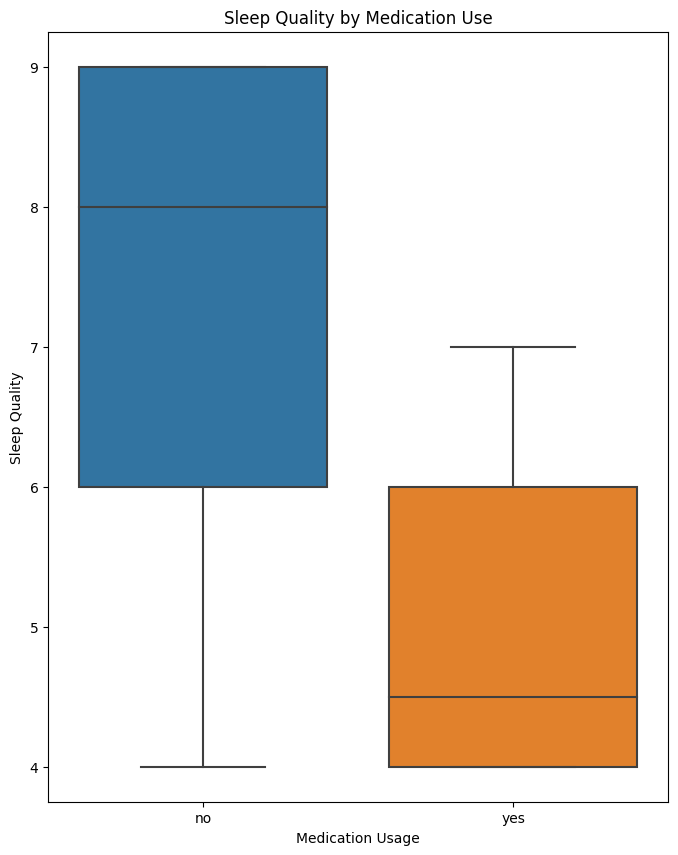

In [17]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='Medication Usage', y='Sleep Quality', data=df)
plt.title('Sleep Quality by Medication Use')
plt.show()

Sleep quality is better with no medication usage as compared to sleep quality with medication usage.

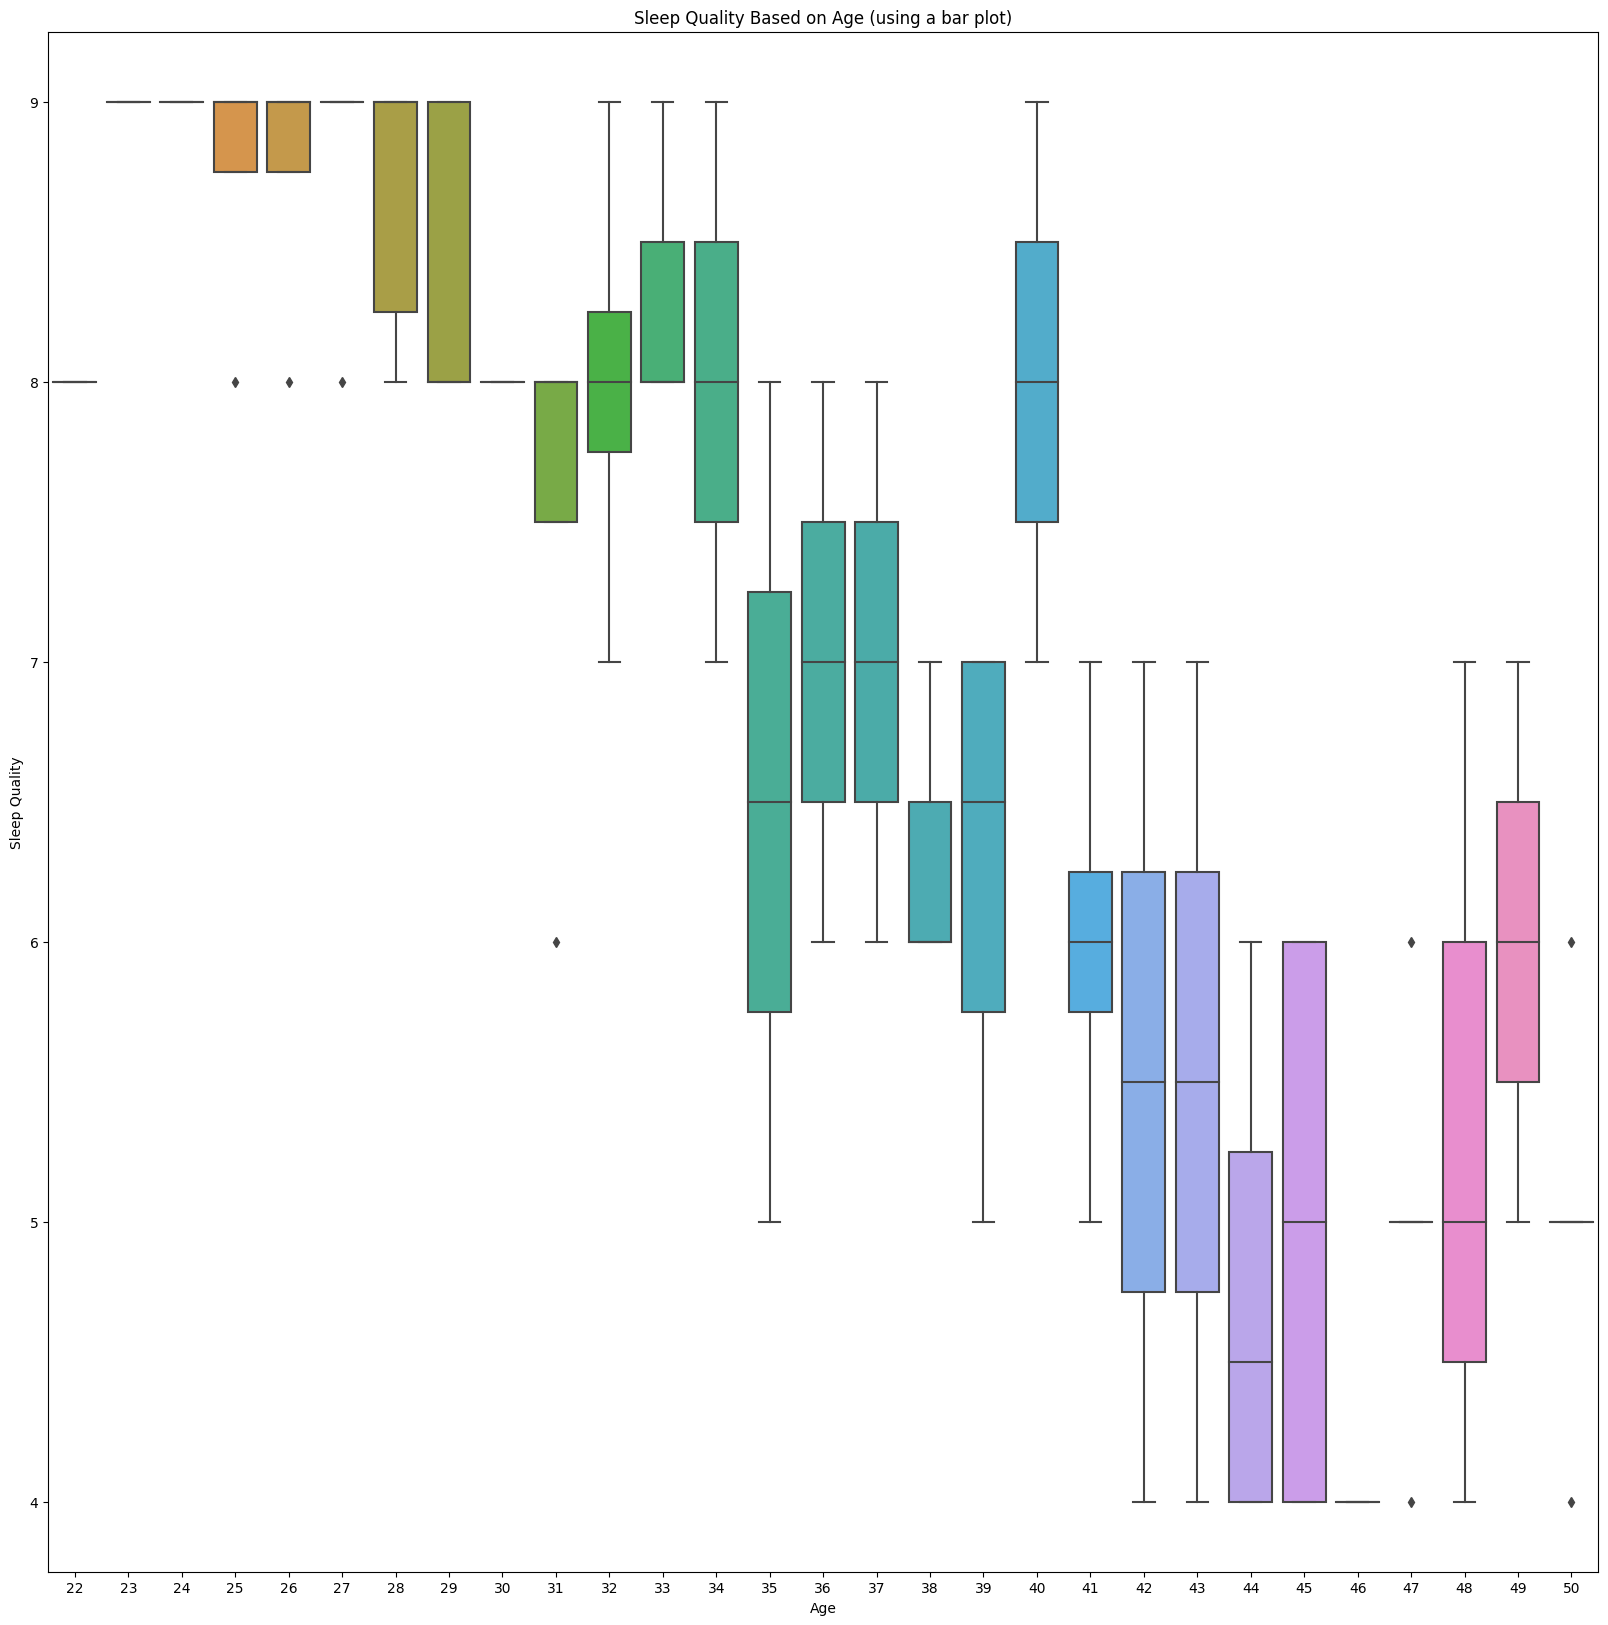

In [18]:
plt.figure(figsize=(20, 20))
sns.boxplot(x='Age', y='Sleep Quality', data=df)
plt.title('Sleep Quality Based on Age (using a bar plot)')
plt.show()

Sleep quality generally decreases as age increases.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


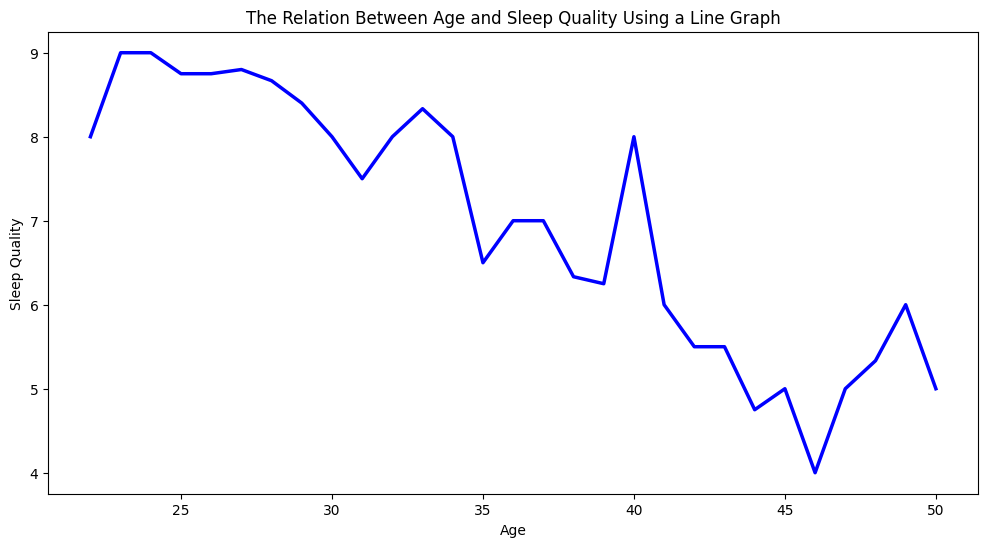

In [19]:
agequal2=df.groupby("Age")['Sleep Quality'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "Age", y = "Sleep Quality",data = agequal2,color="blue",linewidth = 2.5)
plt.title('The Relation Between Age and Sleep Quality Using a Line Graph')
plt.show()

With this representation, as age progresses, sleep quality generally declines.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


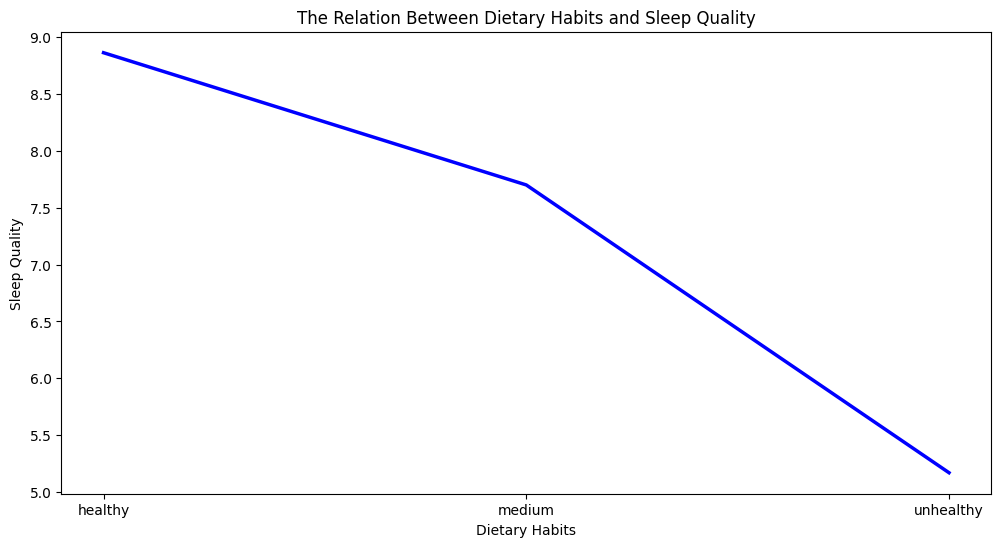

In [20]:
agefood=df.groupby("Dietary Habits")['Sleep Quality'].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = "Dietary Habits", y = "Sleep Quality",data = agefood,color="blue",linewidth = 2.5)
plt.title('The Relation Between Dietary Habits and Sleep Quality')
plt.show()

As dietary habits get worse, sleep quality tends to decline.

<Axes: >

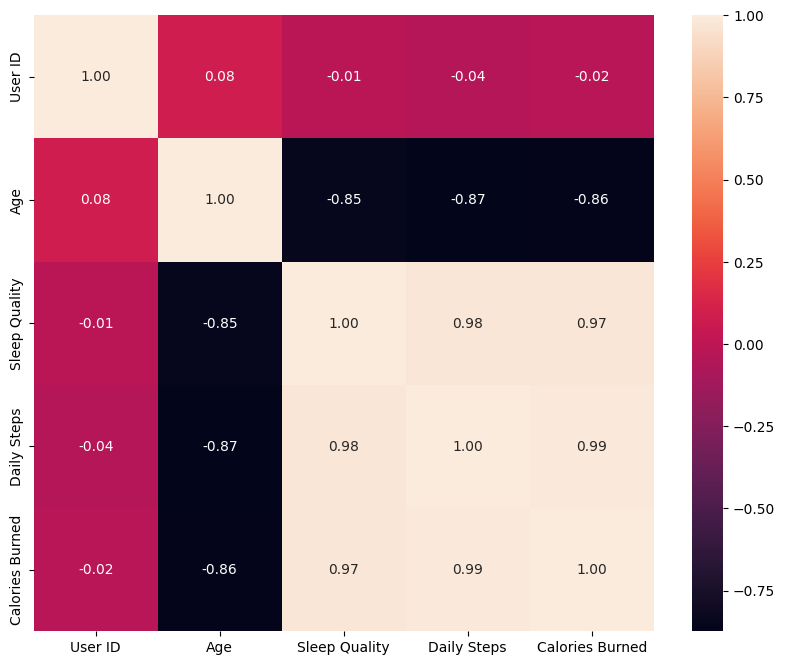

In [21]:
number = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(number.corr(),annot=True, fmt='.2f')

-There is a strong positive correlation between daily steps and calories burned & sleep quality.

-There is a strong negative correlation between age and calories burned & daily steps & sleep quality.

**Conclusions:**

**Sleep Quality/Disorders**: 

-Sleep quality tends to decline as age progresses.

-Sleep Quality is highest when physical activity as high, and sleep quality is lowest when physical activity is low.

-Sleep Quality is much higher without medication usage.

-A large amount of people who don't have sleep disorders don't do medication usage but people who have sleep disorders are roughly equal in terms of medication usage.

-A large amount of people who don't have sleep disorders have medium/healthy dietary habits while everyone with sleep disorders has unhealthy dietary habits.

-For people with no sleep disorders, a large amount of females have sleep disorders compared to men. For people with sleep disorders, there is a much larger set of males than there is for females.

-Sleep quality tends to increase as calories burned increase.

-Sleep quality tends to increase as daily steps increase.


-People with healthy habits tend to have much better sleep quality compared to those with unhealthy habits

-Sleep quality is better with no medication usage as compared to sleep quality with medication usage.

-As dietary habits get worse, sleep quality tends to decline.






**Other**:

-Calories burned tend to increase as daily steps increase (as expected).

-Daily steps tends to decline as age progresses.

-Calories burned tends to decline as age progresses.

-For people with low physical activity, the set of men is much larger than the set of women. With medium physical acitivty, it is the same case. For people with high phyiscal activity, the amount of women dominate the amount of men.


**Based on the heatmap**

-There is a strong positive correlation between daily steps and calories burned & sleep quality.

-There is a strong negative correlation between age and calories burned & daily steps & sleep quality.




